### Importancia de paquetes importados
- networkx: necesario para el manejo de grafos
- numpy: facilidad para manejar la matriz que representa al grafo con el objeto array y el operador @
- random: usado para la creación de grafos

In [68]:
import networkx as nx
import numpy as np
import random as rd

#### Definicion de funcion encargada de generar aleatoriamente el grafo

In [141]:
def creacion_grafo():
    """
    #para grafo no necesariamente completo
    #Grafo completo
    G = nx.Graph()
    #definicion de numero de nodos
    n = rd.randint(2,8)
    """
    """
    Si vieramos a un grafo como un poligono tenemos
    numero de lados = n
    numero de diagonales totales n*(n-3)/2
    Total de enlaces posibles = numero de lados + numero de diagonales totales
    Maximo numero de aristas = n*(n-1)/2
    """
    """
    m = rd.randint(1,((n*(n-1))/2))
    #lista que alberga los nodos del grafo
    nodos = []
    #lista que alberga las aristas ponderadas del grafo
    aristas = []
    #completar lista de nodos
    for i in range(n):
        nodos.append(i)
    #asignar nodos al grafo
    G.add_nodes_from(nodos)
    #completar la lista de aristas
    for i in range(m):
        a = rd.randint(1,n)
        b = rd.randint(1,n)
        while (b == a):
            b = rd.randint(1,n)
        #vamos cargando la lista de aristas con 3-tuplas del tipo (nodo,nodo,ponderacion)
        #aristas.append( (a,b,{'weight':rd.randint(1,5)}) )
        G.add_edge(a,b,weight=rd.randint(1,5))
    #asignar aristas al grafo
    #G.add_edges_from(aristas)
    
    """
    #para grafo completo
    #definicion de numero de nodos
    n = rd.randint(1,10)
    #Definicion del grafo completo
    G = nx. complete_graph(n)
    #modificacion de las ponderaciones de las aristas del grafo
    for (a,b) in G.edges:
        G.edges[a,b]['weight'] = rd.randint(1,5)
    
    return G

#### Definicion de funcion encargada de retornar la matriz laplaciana de un grafo en formato array de numpy

In [70]:
def matriz_laplaciana(G):
    #laplacian_matrix() es una funcion de networkx que toma un grafo y retorna la laplaciana del mismo
    L = nx.laplacian_matrix(G)
    #conversion de tipo grafo de nx a array de np con toarray()
    return L.toarray()

#### Definicion de funcion encargada de retornar la matriz de incidencia de un grafo en formato array de numpy

In [71]:
def matriz_incidencia(G):
    #incidence_matrix(), funcion de networkx que toma un grafo y retorna la matriz de incidencia
    B = nx.incidence_matrix(G, oriented=False)
    return B.toarray()

#### Definicion de funcion encargada de retornar la matriz de resistencia efectiva desde un grafo genérico G

In [79]:
def matriz_resis_efect(G):
    B = matriz_incidencia(G)
    print("Matriz de incidencia del grafo")
    print(B)
    L = matriz_laplaciana(G)
    print("Matriz laplaciana del grafo")
    print(L)
    #linalg.pinv() es una funcion de numpy que computa la pseudoinversa de una matriz
    Lp = np.linalg.pinv(L)
    print("Pseudo-inversa del laplaciano")
    print(Lp)
    #la matriz de resistencia efectiva se da por el producto de la siguientes matrices
    #cada parte es un objeto array de numpy
    return B.transpose()@Lp@B

#### Definicion de la funcion principal

In [118]:
def main():
    #creacion de un grafo ponderado
    G = creacion_grafo()
    R = matriz_resis_efect(G)
    print("Matriz de resistencia efectiva")
    print(R)
    print("Grafo generado")
    nx.draw(G)

### Aquí algunas prubeas

Matriz de incidencia del grafo
[[1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 0. 1. 0. 1. 1.]]
Matriz laplaciana del grafo
[[14 -3 -4 -3 -4]
 [-3 12 -3 -2 -4]
 [-4 -3 12 -4 -1]
 [-3 -2 -4 14 -5]
 [-4 -4 -1 -5 14]]
Pseudo-inversa del laplaciano
[[ 0.04588478 -0.0131619  -0.00976629 -0.01276408 -0.01019251]
 [-0.0131619   0.0538126  -0.01404276 -0.01689849 -0.00970946]
 [-0.00976629 -0.01404276  0.05477872 -0.0101641  -0.02080557]
 [-0.01276408 -0.01689849 -0.0101641   0.04665199 -0.00682532]
 [-0.01019251 -0.00970946 -0.02080557 -0.00682532  0.04753286]]
Matriz de resistencia efectiva
[[ 0.07337359  0.00891383  0.00306031  0.01282091  0.01684166  0.01098814
   0.02074874 -0.05347162 -0.04371102 -0.04956454]
 [ 0.00891383  0.08113092  0.01319031  0.00512041  0.01780777 -0.05013284
  -0.05820274  0.02208425  0.01401435 -0.05392626]
 [ 0.00306031  0.01319031  0.0670086   0.01610286 -0.0499

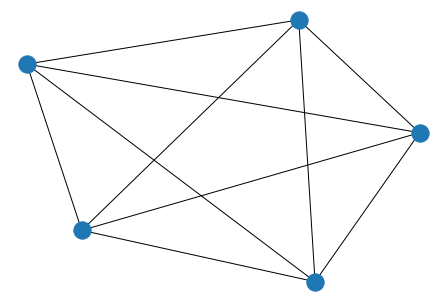

In [133]:
main()

Matriz de incidencia del grafo
[[1.]
 [1.]]
Matriz laplaciana del grafo
[[ 2 -2]
 [-2  2]]
Pseudo-inversa del laplaciano
[[ 0.125 -0.125]
 [-0.125  0.125]]
Matriz de resistencia efectiva
[[-1.38777878e-17]]
Grafo generado


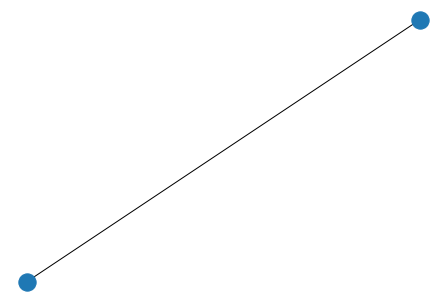

In [134]:
main()

Matriz de incidencia del grafo
[[1. 1. 1. 0. 0. 0.]
 [1. 0. 0. 1. 1. 0.]
 [0. 1. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1. 1.]]
Matriz laplaciana del grafo
[[ 8 -4 -3 -1]
 [-4 13 -4 -5]
 [-3 -4 11 -4]
 [-1 -5 -4 10]]
Pseudo-inversa del laplaciano
[[ 0.07296651 -0.01674641 -0.0215311  -0.034689  ]
 [-0.01674641  0.04346093 -0.01555024 -0.01116427]
 [-0.0215311  -0.01555024  0.05143541 -0.01435407]
 [-0.034689   -0.01116427 -0.01435407  0.06020734]]
Matriz de resistencia efectiva
[[ 0.08293461  0.01913876  0.01036683 -0.01036683 -0.01913876 -0.08293461]
 [ 0.01913876  0.08133971  0.00239234 -0.00239234 -0.08133971 -0.01913876]
 [ 0.01036683  0.00239234  0.06379585 -0.06379585 -0.00239234 -0.01036683]
 [-0.01036683 -0.00239234 -0.06379585  0.06379585  0.00239234  0.01036683]
 [-0.01913876 -0.08133971 -0.00239234  0.00239234  0.08133971  0.01913876]
 [-0.08293461 -0.01913876 -0.01036683  0.01036683  0.01913876  0.08293461]]
Grafo generado


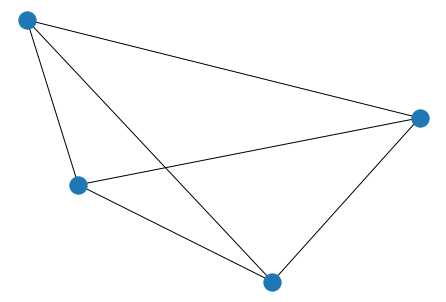

In [136]:
main()

Matriz de incidencia del grafo
[[1. 1. 1. 0. 0. 0.]
 [1. 0. 0. 1. 1. 0.]
 [0. 1. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1. 1.]]
Matriz laplaciana del grafo
[[ 8 -5 -2 -1]
 [-5 11 -4 -2]
 [-2 -4 11 -5]
 [-1 -2 -5  8]]
Pseudo-inversa del laplaciano
[[ 0.07738095 -0.00595238 -0.0297619  -0.04166667]
 [-0.00595238  0.05357143 -0.01785714 -0.0297619 ]
 [-0.0297619  -0.01785714  0.05357143 -0.00595238]
 [-0.04166667 -0.0297619  -0.00595238  0.07738095]]
Matriz de resistencia efectiva
[[ 1.19047619e-01  2.38095238e-02 -2.77555756e-17  1.38777878e-17
  -2.38095238e-02 -1.19047619e-01]
 [ 2.38095238e-02  7.14285714e-02 -2.08166817e-17  6.93889390e-18
  -7.14285714e-02 -2.38095238e-02]
 [-2.08166817e-17  0.00000000e+00  7.14285714e-02 -7.14285714e-02
   0.00000000e+00  2.08166817e-17]
 [-1.38777878e-17 -1.38777878e-17 -7.14285714e-02  7.14285714e-02
   1.38777878e-17  1.38777878e-17]
 [-2.38095238e-02 -7.14285714e-02  2.08166817e-17 -1.38777878e-17
   7.14285714e-02  2.38095238e-02]
 [-1.19047619e-01 -2.380

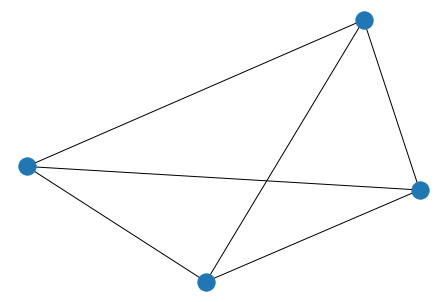

In [140]:
main()

Matriz de incidencia del grafo
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1.

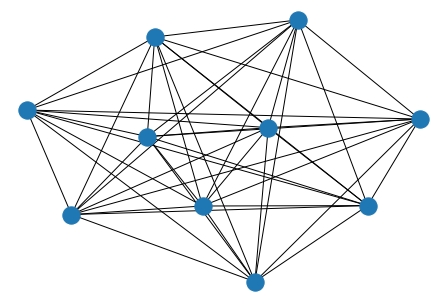

In [142]:
main()